### Lesson on Bias vs. Variance in Machine Learning

In machine learning, bias and variance are two essential components of model errors. Understanding the trade-off between bias and variance helps in building models that generalize well to new data.

- **Bias**: Bias is an error introduced in your model due to oversimplified assumptions in the learning algorithm. High bias can cause an algorithm to miss relevant relations between features and target outputs (underfitting). Low-bias models are usually more complex, capturing more signals from the data.

- **Variance**: Variance is an error introduced in your model due to excessive sensitivity to small fluctuations in the training set. High variance can cause an algorithm to model the random noise in the training data, rather than the intended outputs (overfitting). Low-variance models are simpler but may miss subtle differences in data.

**Trade-off**: Ideally, you want both low bias and low variance, but typically decreasing one increases the other. The goal is to find a good balance without underfitting or overfitting the data.

### Example: Polynomial Regression with Bias-Variance Trade-off

Let's consider polynomial regression, which is suitable for modeling relationships that aren't linear. Our task will be to fit a model to a dataset that's best represented by a parabolic curve.

#### Step 1: Generate Test Data
We'll create synthetic data that follows a parabolic curve with some noise.


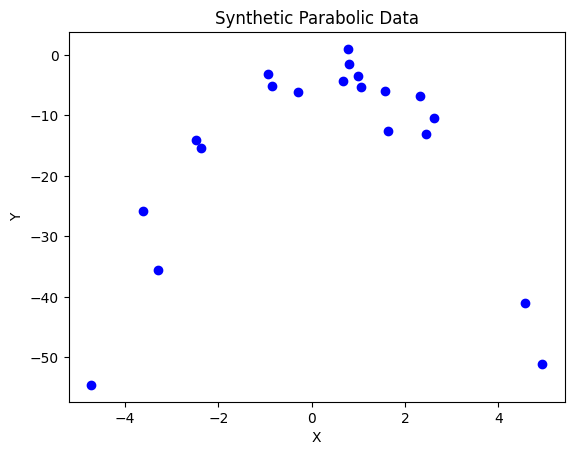

In [13]:
import numpy as np
import matplotlib.pyplot as plt

# Generate synthetic data
np.random.seed(0)
X = 2 - 3 * np.random.normal(0, 1, 20)
y = X - 2 * (X**2) + np.random.normal(-3, 3, 20)

# Visualizing the data
plt.scatter(X, y, color='blue')
plt.title('Synthetic Parabolic Data')
plt.xlabel('X')
plt.ylabel('Y')
plt.show()





#### Step 2: Fit Models with Different Complexities

We'll fit polynomial regression models with varying degrees to see how bias and variance affect them.




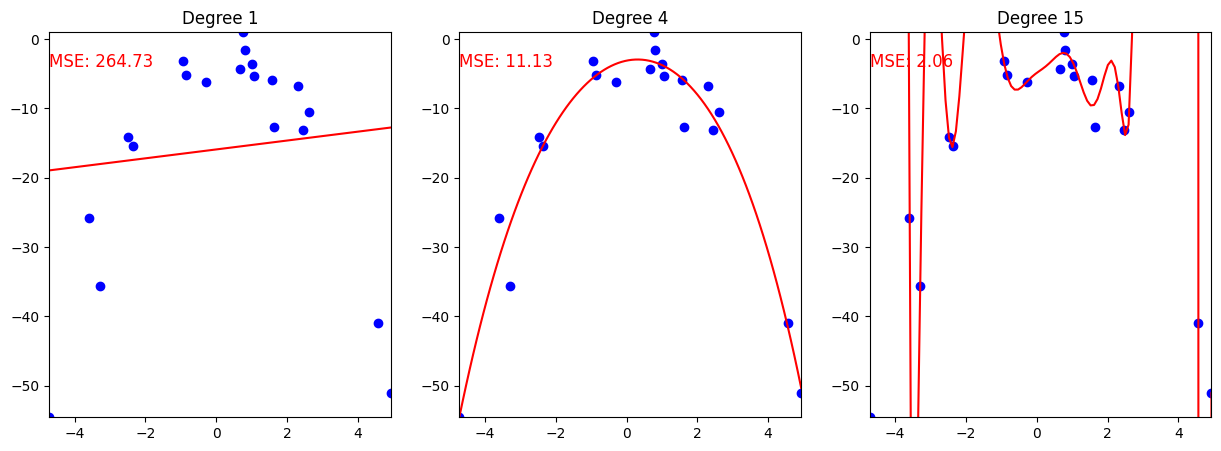

In [15]:

from sklearn.metrics import mean_squared_error
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline

# Function to fit and plot models
def plot_model(degree, ax):
    model = make_pipeline(PolynomialFeatures(degree), LinearRegression())
    model.fit(X.reshape(-1, 1), y)
    x_range = np.linspace(np.min(X), np.max(X), 100).reshape(-1, 1)  # Correctly set the x-range based on data
    y_pred = model.predict(x_range)

    # Plotting
    ax.scatter(X, y, color='blue')
    ax.plot(x_range, y_pred, color='red')
    ax.set_title(f'Degree {degree}')
    ax.set_xlim([np.min(X), np.max(X)])
    ax.set_ylim([np.min(y), np.max(y)])
    mse = mean_squared_error(y, model.predict(X.reshape(-1, 1)))
    ax.text(np.min(X), np.max(y) - 5, f'MSE: {mse:.2f}', fontsize=12, color='red')
    return mse

# Plot models with different polynomial degrees
fig, axs = plt.subplots(1, 3, figsize=(15, 5))
degrees = [1, 4, 15]
for i, degree in enumerate(degrees):
    plot_model(degree, axs[i])

plt.show()




#### Explanation:
- **Low-degree Polynomial (High Bias, Low Variance)**: Doesn't capture the parabolic relationship, underfits the data.
- **Medium-degree Polynomial (Balanced Bias-Variance)**: Fits the data well, capturing the parabolic trend.
- **High-degree Polynomial (Low Bias, High Variance)**: Overfits the data, capturing noise and fluctuations.

Even though the squiggly line did a great job fitting the training set it did a terrible job fitting the testing set.

#### Step 3: Evaluate and Find the Sweet Spot

The medium-degree polynomial likely represents the "sweet spot" in this particular example, minimizing both bias and variance sufficiently while providing the best generalization on unseen data. The MSE printout and the plotted graphs serve as a visual and quantitative assessment to confirm this.

This method demonstrates the essential steps to understand and visualize the bias-variance tradeoff in any machine learning model building and how to approach finding an optimal model complexity.

##Gradient Boost
There is 2 ways to use GradientBoost:

1. Classification

2. Regression (predict a continuous values)


**Gradient Boosting vs. Random Forest: Learning from Errors and Adjusting with Learning Rate**

**Gradient Boosting** and **Random Forest** are both ensemble techniques that use decision trees, but they differ significantly in their approach to learning and error correction.

### Gradient Boosting
Gradient Boosting builds an ensemble of decision trees sequentially. Each new tree in the sequence is created to correct the errors made by the previous trees. The method specifically focuses on the residuals (errors) from the predictions: each new tree predicts the residuals of the prior trees, effectively learning from past mistakes. Over time, this approach reduces both bias and error in the model.

The **learning rate** in Gradient Boosting plays a crucial role in controlling how much each tree contributes to the final model. A lower learning rate means each tree has a smaller impact, requiring more trees to achieve high accuracy but often resulting in a more robust model that generalizes better. This parameter helps to prevent overfitting by damping the influence of each individual tree.

### Random Forest
Random Forest, in contrast, builds many decision trees in parallel and averages their predictions. Each tree in a Random Forest is built from a random sample of the data, and at each split in the tree, a random subset of the features is considered. This randomization helps in making the model more resilient to noise in the data, effectively reducing variance without increasing bias too much.

### Connection and Contrast
- **Error Learning**: Gradient Boosting explicitly learns from the errors of previous trees (sequential improvement), whereas Random Forest does not learn from errors per se but reduces variance through averaging multiple independently created trees.
- **Learning Rate**: Only relevant in Gradient Boosting, the learning rate moderates the corrections applied by subsequent trees, thus directly controlling the speed and stability of learning from errors.
- **Ensemble Strategy**: Both methods use ensembles but differently—Gradient Boosting corrects errors sequentially, while Random Forest reduces errors by averaging parallel predictions.

In summary, while both methods use decision trees, Gradient Boosting refines its predictions through learning from past errors with controlled adjustments via the learning rate, whereas Random Forest relies on averaging diverse trees built with randomized data and features to ensure robust generalization.


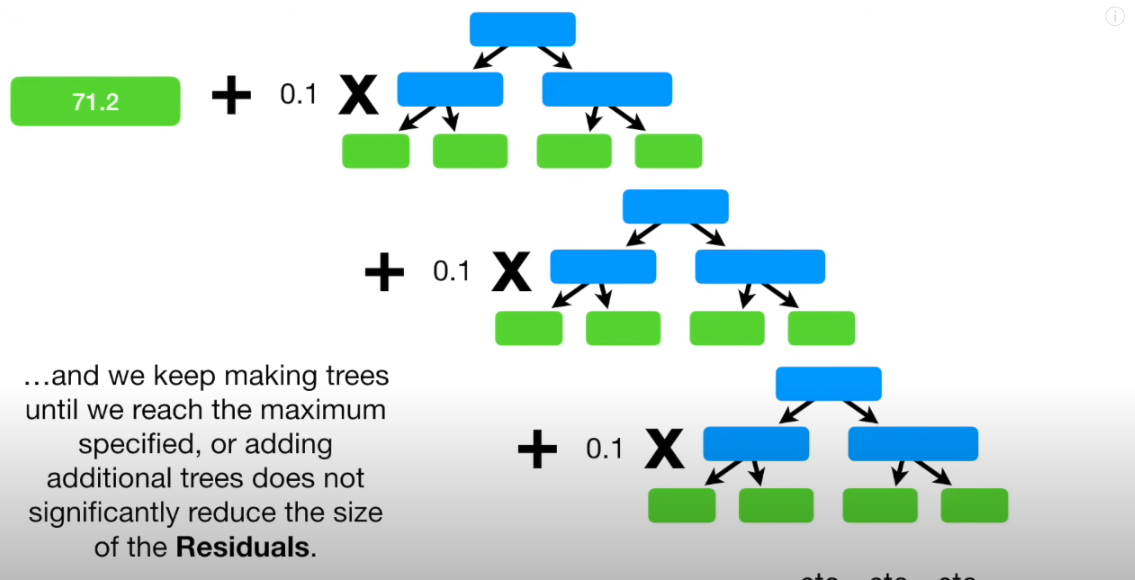

In [16]:
import pandas as pd
from sklearn.model_selection import train_test_split
data = {'Weight (grams)': [150, 130, 160, 140, 155, 145],
        'Color (1=Red, 0=Orange)': [1, 1, 0, 0, 1, 0],
        'Fruit Type': ['Apple', 'Apple', 'Orange', 'Orange', 'Apple', 'Orange']}
df = pd.DataFrame(data)

In [7]:
X = df[['Weight (grams)', 'Color (1=Red, 0=Orange)']]
y = df['Fruit Type']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [9]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import accuracy_score
# Create and train the Gradient Boosting classifier
gb_model = GradientBoostingClassifier()
gb_model.fit(X_train, y_train)

# Make predictions on the test set
gb_y_pred = gb_model.predict(X_test)

# Calculate accuracy
gb_accuracy = accuracy_score(y_test, gb_y_pred)
print(f'Accuracy (Gradient Boosting): {gb_accuracy}')

Accuracy (Gradient Boosting): 1.0


###Random Forest

Step 1:

Creat a bootstrapped Dataset from our original
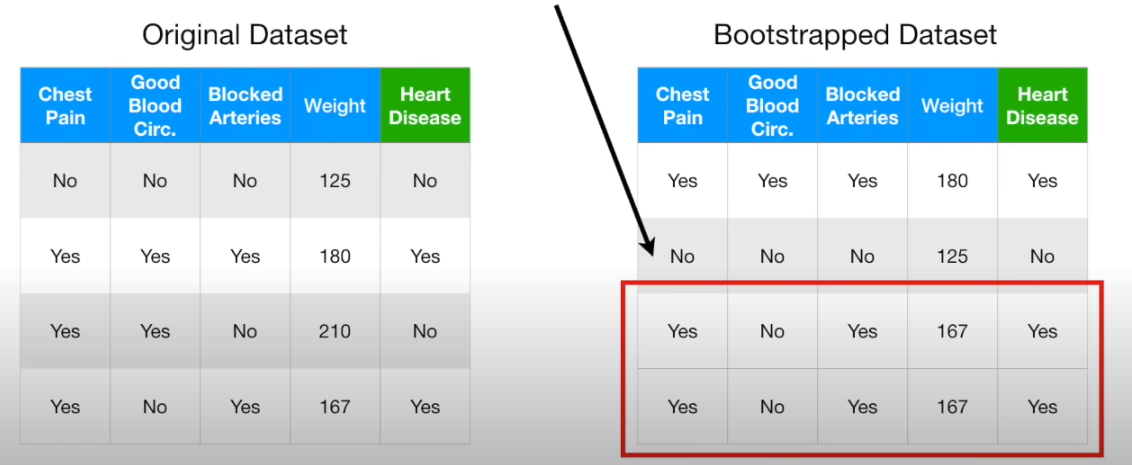
Step 2:
Creat a decision tree from the bootstrapped data but only use a random subset of variables at each step (at each level pick )

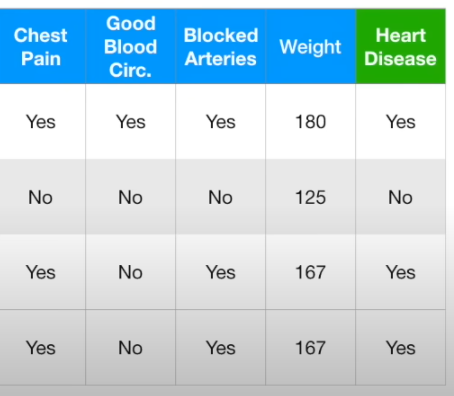


Lets say we randomly select Good blood Circ and Blocked Arteries and Goof blood circ did the best job seperating the samples.
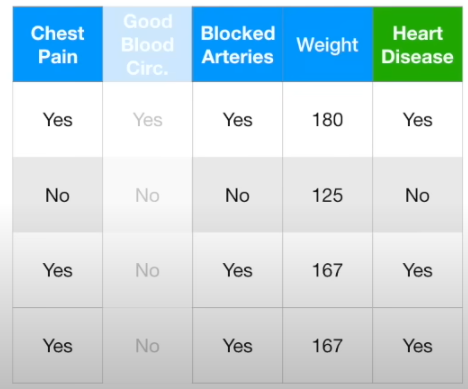



So now we are going to grey it out and pick another 2 more columns for the next level of the tree

We do this until we have a full tree that seperates all the data nodes.

Now we have to go back to the first step, make a new bootstrapped dataset from our original data, and build a tree considering a subest of variables at each level.


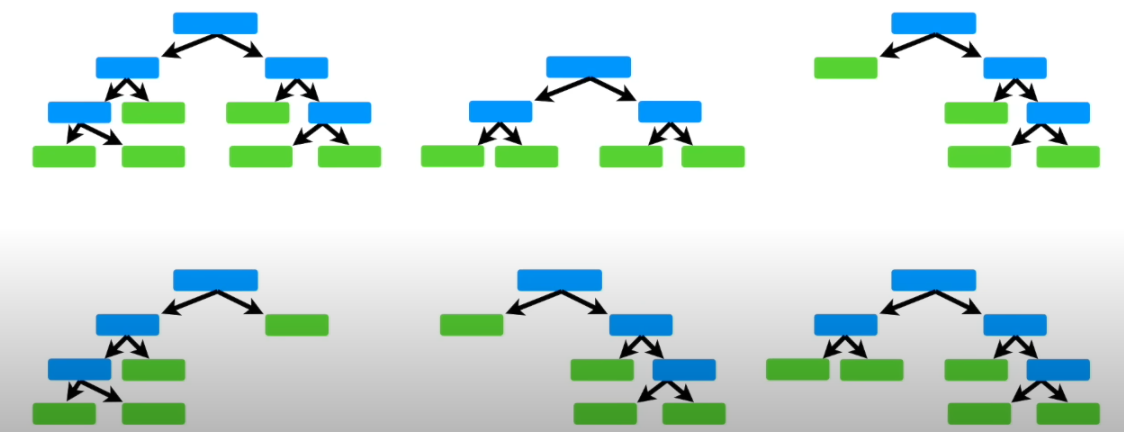


After this we will have a bunch of decision trees based on our data.
Most the time we will have 100s of decision trees.


Now lets say we want to predict with a new row of data, if the patient will have heart disease.What we will do is plug that data into every tree and see whether it'll classify it as 'Yes' or no.

We will keep a tally of these answers:
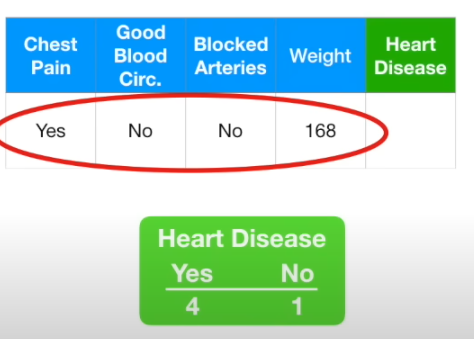


We see here that 'Yes' recieved more votes and therefore our random forest classifier will conclude that the patient has heart disease.

TERMINOLOGY ALERT!
Bootstraping the data plus using the aggregate to make a decision is called "Bagging"

Now how do we know if the classifier is good?

We allow duplicate entries in the bootstrap data set, typically 1/3 of the data will not end up in the bootstraped dataset.

So what we are going to do is we are going to take all of the data that was 'out of bag' and we are going to test those samples against our decision trees and see where it correctly classifies it and where it incorrectly classifies it.

The proportion of 'out of bag' samples that were incorrectly classified is the "Out of bag Error".

OPTIMISING THE RANDOM FOREST

In the last example we took 2 random variables each step and from that built our decision trees. But what happens if take 3 random variables at each step?

We do this a bunch of times and then choose the most accurate model.
What is this called?

 HYPERPARAMETER TUNING!

###Hypereparameters in SVM

To demonstrate how varying the hyperparameters of a Support Vector Machine (SVM) affects the decision boundaries in a 3D plot, we'll use a synthetic dataset and visualize the results for different values of C and gamma. We'll focus on these two parameters, which are critical for tuning SVMs, especially with a radial basis function (RBF) kernel.

##Step 1: Generate Synthetic Data
We'll create a 3D dataset with two features and a binary target.

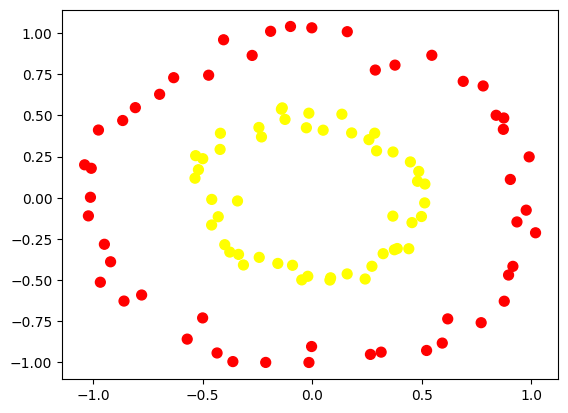

In [17]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_circles

# Generate synthetic data
X, y = make_circles(n_samples=100, factor=.5, noise=.05)

# Visualizing the data in 2D
plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='autumn')
plt.show()


##Step 2: Define Function for Fitting SVM and Plotting in 3D
Now, let's define a function to fit an SVM model and plot its decision surface in 3D. This function will allow us to clearly see how changes in C and gamma affect the model.

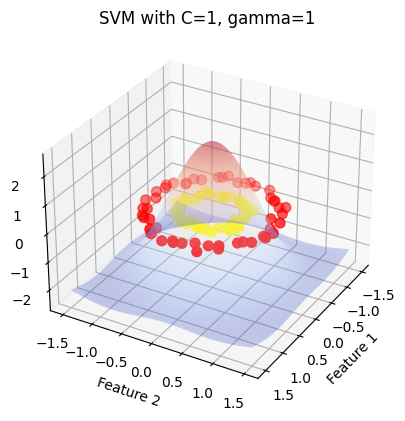

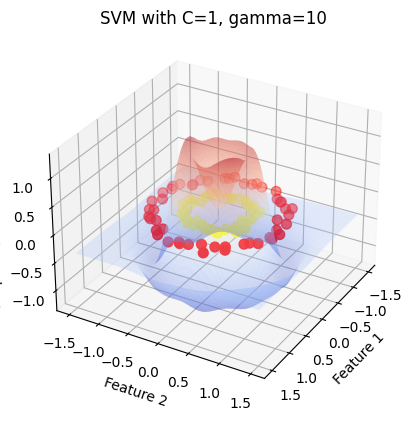

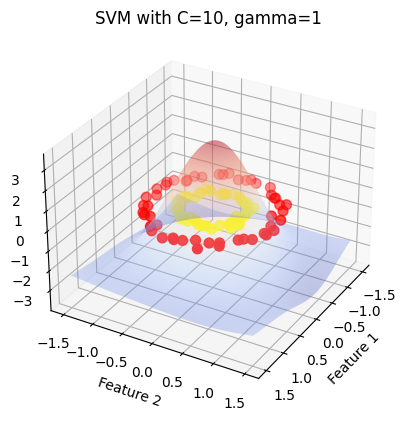

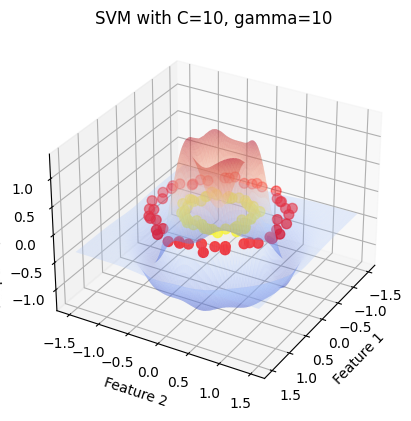

In [19]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_circles
from sklearn.svm import SVC
from mpl_toolkits.mplot3d import Axes3D

# Generate synthetic data
X, y = make_circles(n_samples=100, factor=.5, noise=.05)

def plot_3d_svm(X, y, C, gamma):
    # Fit model
    clf = SVC(kernel='rbf', C=C, gamma=gamma)
    clf.fit(X, y)

    # Mesh grid for 3D plot
    temp = np.linspace(-1.5, 1.5, 100)
    x, y_mesh = np.meshgrid(temp, temp)
    Z = clf.decision_function(np.c_[x.ravel(), y_mesh.ravel()])
    Z = Z.reshape(x.shape)

    # Plotting
    fig = plt.figure()
    ax = fig.add_subplot(111, projection='3d')
    ax.plot_surface(x, y_mesh, Z, rstride=1, cstride=1, alpha=0.3, cmap='coolwarm')
    ax.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='autumn')
    ax.view_init(elev=30, azim=30)  # elevation and angle
    ax.set_xlabel('Feature 1')
    ax.set_ylabel('Feature 2')
    ax.set_zlabel('Decision boundary')
    ax.set_title(f'SVM with C={C}, gamma={gamma}')
    plt.show()

# Example parameters
plot_3d_svm(X, y, C=1, gamma=1)
plot_3d_svm(X, y, C=1, gamma=10)
plot_3d_svm(X, y, C=10, gamma=1)
plot_3d_svm(X, y, C=10, gamma=10)


##Explanation of Plots


C=1, gamma=1: This setting shows a balance between penalty and flexibility. The decision boundary is not too rigid but adequately fits the data.
C=1, gamma=10: Increasing gamma makes the model more sensitive to the data points (higher influence of individual points), resulting in a more wiggly boundary.


C=10, gamma=1: Increasing C reduces the margin and tries to classify all training examples correctly, leading to a more complex boundary that might overfit.


C=10, gamma=10: Both high C and high gamma produce a model that highly adheres to the data points, likely overfitting with a very irregular boundary.
These plots illustrate the effect of SVM hyperparameters in a visual and intuitive way, helping understand how C and gamma tune the model's sensitivity and penalty for misclassifications.


##GridSearchCV



Tuned Logistic Regression Parameters: {'C': 0.006105402296585327}
Best score is 0.853


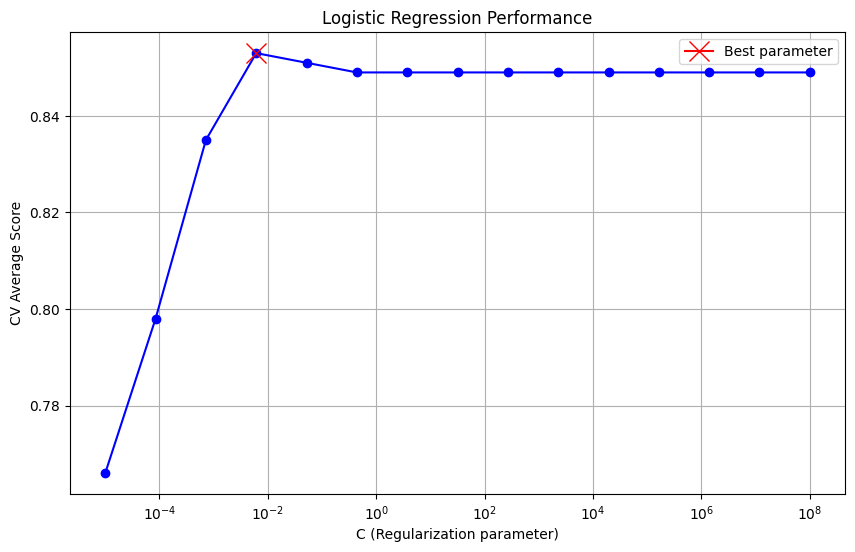

In [21]:
# Necessary imports
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV
import numpy as np
from sklearn.datasets import make_classification
import matplotlib.pyplot as plt

# Generate synthetic data
X, y = make_classification(
    n_samples=1000, n_features=20, n_informative=10, n_classes=2, random_state=42)

# Creating the hyperparameter grid
c_space = np.logspace(-5, 8, 15)
param_grid = {'C': c_space}

# Instantiating logistic regression classifier
logreg = LogisticRegression()

# Instantiating the GridSearchCV object
logreg_cv = GridSearchCV(logreg, param_grid, cv=5)

# Fit the GridSearchCV object to the data
logreg_cv.fit(X, y)

# Print the tuned parameters and score
print("Tuned Logistic Regression Parameters: {}".format(logreg_cv.best_params_))
print("Best score is {}".format(logreg_cv.best_score_))

# Extracting mean test scores based on cross-validation
mean_scores = logreg_cv.cv_results_['mean_test_score']

# Plotting
plt.figure(figsize=(10, 6))
plt.semilogx(c_space, mean_scores, marker='o', color='b', linestyle='-')
plt.semilogx(logreg_cv.best_params_['C'], logreg_cv.best_score_, marker='x', markersize=15, color='r', label='Best parameter')
plt.xlabel('C (Regularization parameter)')
plt.ylabel('CV Average Score')
plt.title('Logistic Regression Performance')
plt.legend()
plt.grid(True)
plt.show()


###Exercise : Complete The Code To Classify Fruits Using Random Forest And RandomizedSearchCV

The "make_classification" function from the sklearn.datasets module in scikit-learn is a utility used to generate a synthetic dataset suitable for testing and benchmarking classification algorithms. This function is highly configurable and can produce datasets with a variety of characteristics, which makes it particularly useful for simulating different data science scenarios and challenges.

Key Parameters of make_classification:
Here are some of the key parameters you can adjust in make_classification to tailor the dataset to specific needs:

n_samples: The total number of samples (rows) in the dataset.
n_features: The total number of features (columns) in the dataset.
n_informative: The number of informative features; these are features that are actually useful for classifying the data.
n_redundant: The number of redundant features, which are linear combinations of the informative features, adding no new information but mimicking correlated features.
n_repeated: The number of duplicated features, copied directly from the informative and redundant features.
n_classes: The number of classes (or labels) in the classification problem.
n_clusters_per_class: The number of clusters per class, which can be used to introduce more complexity in the decision boundary.
weights: The proportions of samples assigned to each class, useful for creating imbalanced datasets.
class_sep: A factor multiplying the hypercube size. Larger values spread out the clusters/classes and make the classification task easier.
hypercube: If True, the clusters are placed on the vertices of a multi-dimensional hypercube. If False, the clusters are placed randomly.
shift: A vector of feature shifts (biases).
scale: A vector of feature scales (standard deviations).
shuffle: Whether or not to shuffle the samples and features.
random_state: The seed used by the random number generator for reproducibility.

/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomFor

Tuned Random Forest Parameters: {'n_estimators': 200, 'min_samples_split': 2, 'min_samples_leaf': 1, 'max_features': 'auto', 'max_depth': 20}
Best score is 0.9410000000000001


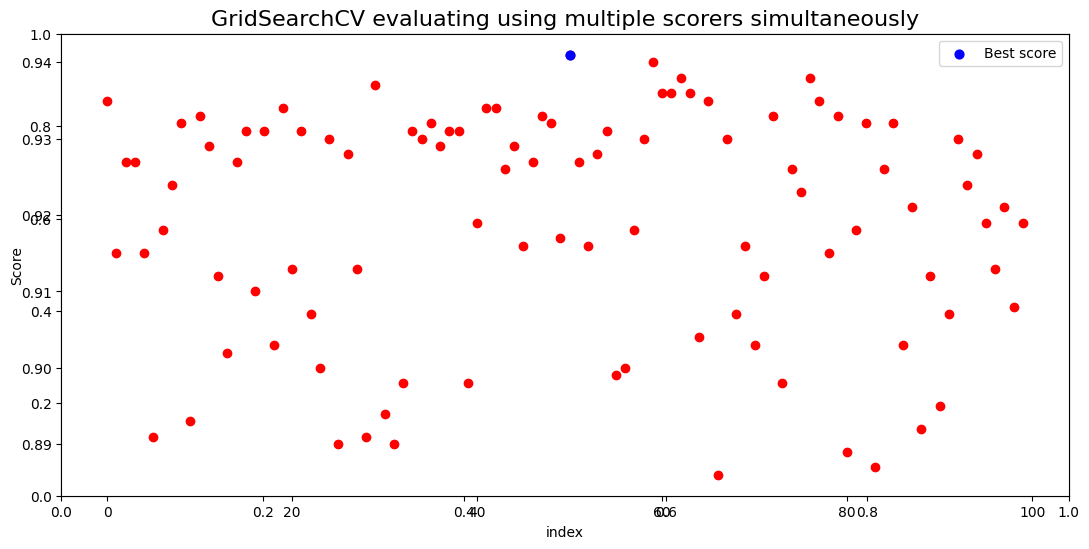

In [23]:
import numpy as np
from sklearn.datasets import make_classification
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import RandomizedSearchCV
import matplotlib.pyplot as plt

# Generate a synthetic dataset for fruit classification
X, y = make_classification(
    n_samples=1000, n_features=20, n_informative=10, n_redundant=5, n_repeated=0,
    n_classes=2, random_state=42)

# Create a hyperparameter grid for Random Forest
param_dist = {
    "n_estimators": [10, 50, 100, 200],
    "max_depth": [None, 10, 20, 30],
    "min_samples_split": [2, 5, 10],
    "min_samples_leaf": [1, 2, 4],
    "max_features": ["auto", "sqrt", "log2", None]
}

# Instantiate a Random Forest classifier
rf = RandomForestClassifier()

# Instantiate RandomizedSearchCV with cross-validation
rf_cv = RandomizedSearchCV(rf, param_dist, cv=5, random_state=42, n_iter=100)

# Fit RandomizedSearchCV to the data
rf_cv.fit(X, y)

# Print the tuned Random Forest hyperparameters and best score
print("Tuned Random Forest Parameters: {}".format(rf_cv.best_params_))
print("Best score is {}".format(rf_cv.best_score_))

# Visualization of results: Plotting the CV results of each parameter combination
results = rf_cv.cv_results_
plt.figure(figsize=(13, 6))
plt.title("GridSearchCV evaluating using multiple scorers simultaneously",
          fontsize=16)

plt.xlabel("index")
plt.ylabel("Score")
plt.grid()

ax = plt.axes()
ax.scatter(range(len(results["mean_test_score"])), results["mean_test_score"], color='red')
ax.scatter([results["rank_test_score"].argmin()], [results["mean_test_score"].max()], color='blue', s=40, label='Best score')
plt.legend()
plt.show()


In [24]:
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV,RandomizedSearchCV
from sklearn import svm